
### Import data into Python environment.

In [4]:
import pandas as pd

In [377]:
comcast_df = pd.read_csv('/Users/anuragmishra/Desktop/Comcast_telecom_complaints_data.csv')

In [734]:
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,NewStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,04,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,08,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,04,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,07,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,05,Closed


### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [381]:
comcast_df['Month'] = comcast_df['Date'].apply(lambda x :x.split('-')[1])

In [735]:
comcast_df.count()

Ticket #                       2224
Customer Complaint             2224
Date                           2224
Date_month_year                2224
Time                           2224
Received Via                   2224
City                           2224
State                          2224
Zip code                       2224
Status                         2224
Filing on Behalf of Someone    2224
Month                          2224
NewStatus                      2224
dtype: int64

In [383]:
monthly_complaints_df = pd.DataFrame(comcast_df.groupby(['Month'])['Customer Complaint'].count())

In [736]:
monthly_complaints_df

,Customer Complaint
Month,
01,55
02,59
03,45
04,375
05,317
06,1046
07,49
08,67
09,55


In [385]:
import matplotlib.pyplot as plt
import numpy as np


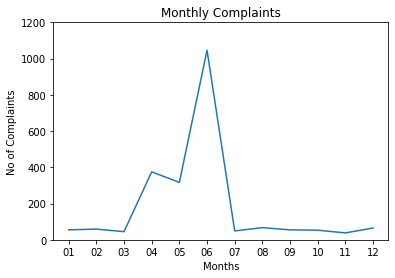

<Figure size 432x288 with 0 Axes>

In [751]:
plt.plot(monthly_complaints_df)
# Add title and axis names
plt.title('Monthly Complaints')
plt.xlabel('Months')
plt.ylabel('No of Complaints')
 # Limits for the Y axis
plt.ylim(0,1200)

# Show graphic
plt.show()
plt.savefig('Monthly.png',dpi=400)




In [387]:
daily_complaints_df= pd.DataFrame(comcast_df.groupby(['Date'])['Customer Complaint'].count())

In [388]:
daily_complaints_df

,Customer Complaint
Date,
04-01-15,18
04-02-15,27
04-03-15,15
04-04-15,12
04-05-15,6
...,...
29-06-15,51
30-04-15,24
30-05-15,9


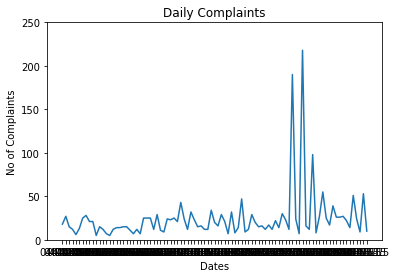

<Figure size 432x288 with 0 Axes>

In [753]:
plt.plot(daily_complaints_df)
# Add title and axis names

plt.title('Daily Complaints')
plt.xlabel('Dates')
plt.ylabel('No of Complaints')
 # Limits for the Y axis
plt.ylim(0,250)



# Show graphic
plt.show()
plt.savefig('Daily.png',dpi=400)

In [390]:
daily_complaints_df['Customer Complaint'].max()

218

### Provide a table with the frequency of complaint types. Which complaint types are maximum i.e., around internet, network issues, or across any other domains.


In [740]:
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,NewStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,04,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,08,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,04,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,07,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,05,Closed


In [739]:
comcast_df['Customer Complaint'].nunique()

1841

In [741]:
max_df= pd.DataFrame(comcast_df['Customer Complaint'].str.lower().value_counts().reset_index())
max_df = max_df.rename(columns={'index':'Complaint Type',"Customer Complaint": "Count"})
max_df

,Complaint Type,Count
0,comcast,102
1,comcast data cap,30
2,comcast internet,29
3,comcast data caps,21
4,comcast billing,18
...,...,...
1735,unreasonable billing,1
1736,comcast internet outage,1
1737,over charging for internet,1
1738,comcast billing error,1


In [467]:
#max complaint type
max_df[:1]

,Complaint Type,Count
0,comcast,102


In [468]:
comcast_df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

###  Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [742]:
comcast_df["NewStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in comcast_df["Status"]]


In [743]:
comcast_df.head()


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,NewStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,04,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,08,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,04,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,07,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,05,Closed


### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [639]:
import matplotlib.pyplot as pt

In [746]:

Status_complaints = comcast_df.groupby(["State","NewStatus"]).size()
Status_complaints=Status_complaints.unstack().fillna(0).head()

In [747]:
Status_complaints

NewStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


In [745]:
max = comcast_df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index()


### Which state has the maximum complaints?

In [748]:
max.rename({0:'Count'},axis = 1).max()


State    West Virginia
Count              288
dtype: object

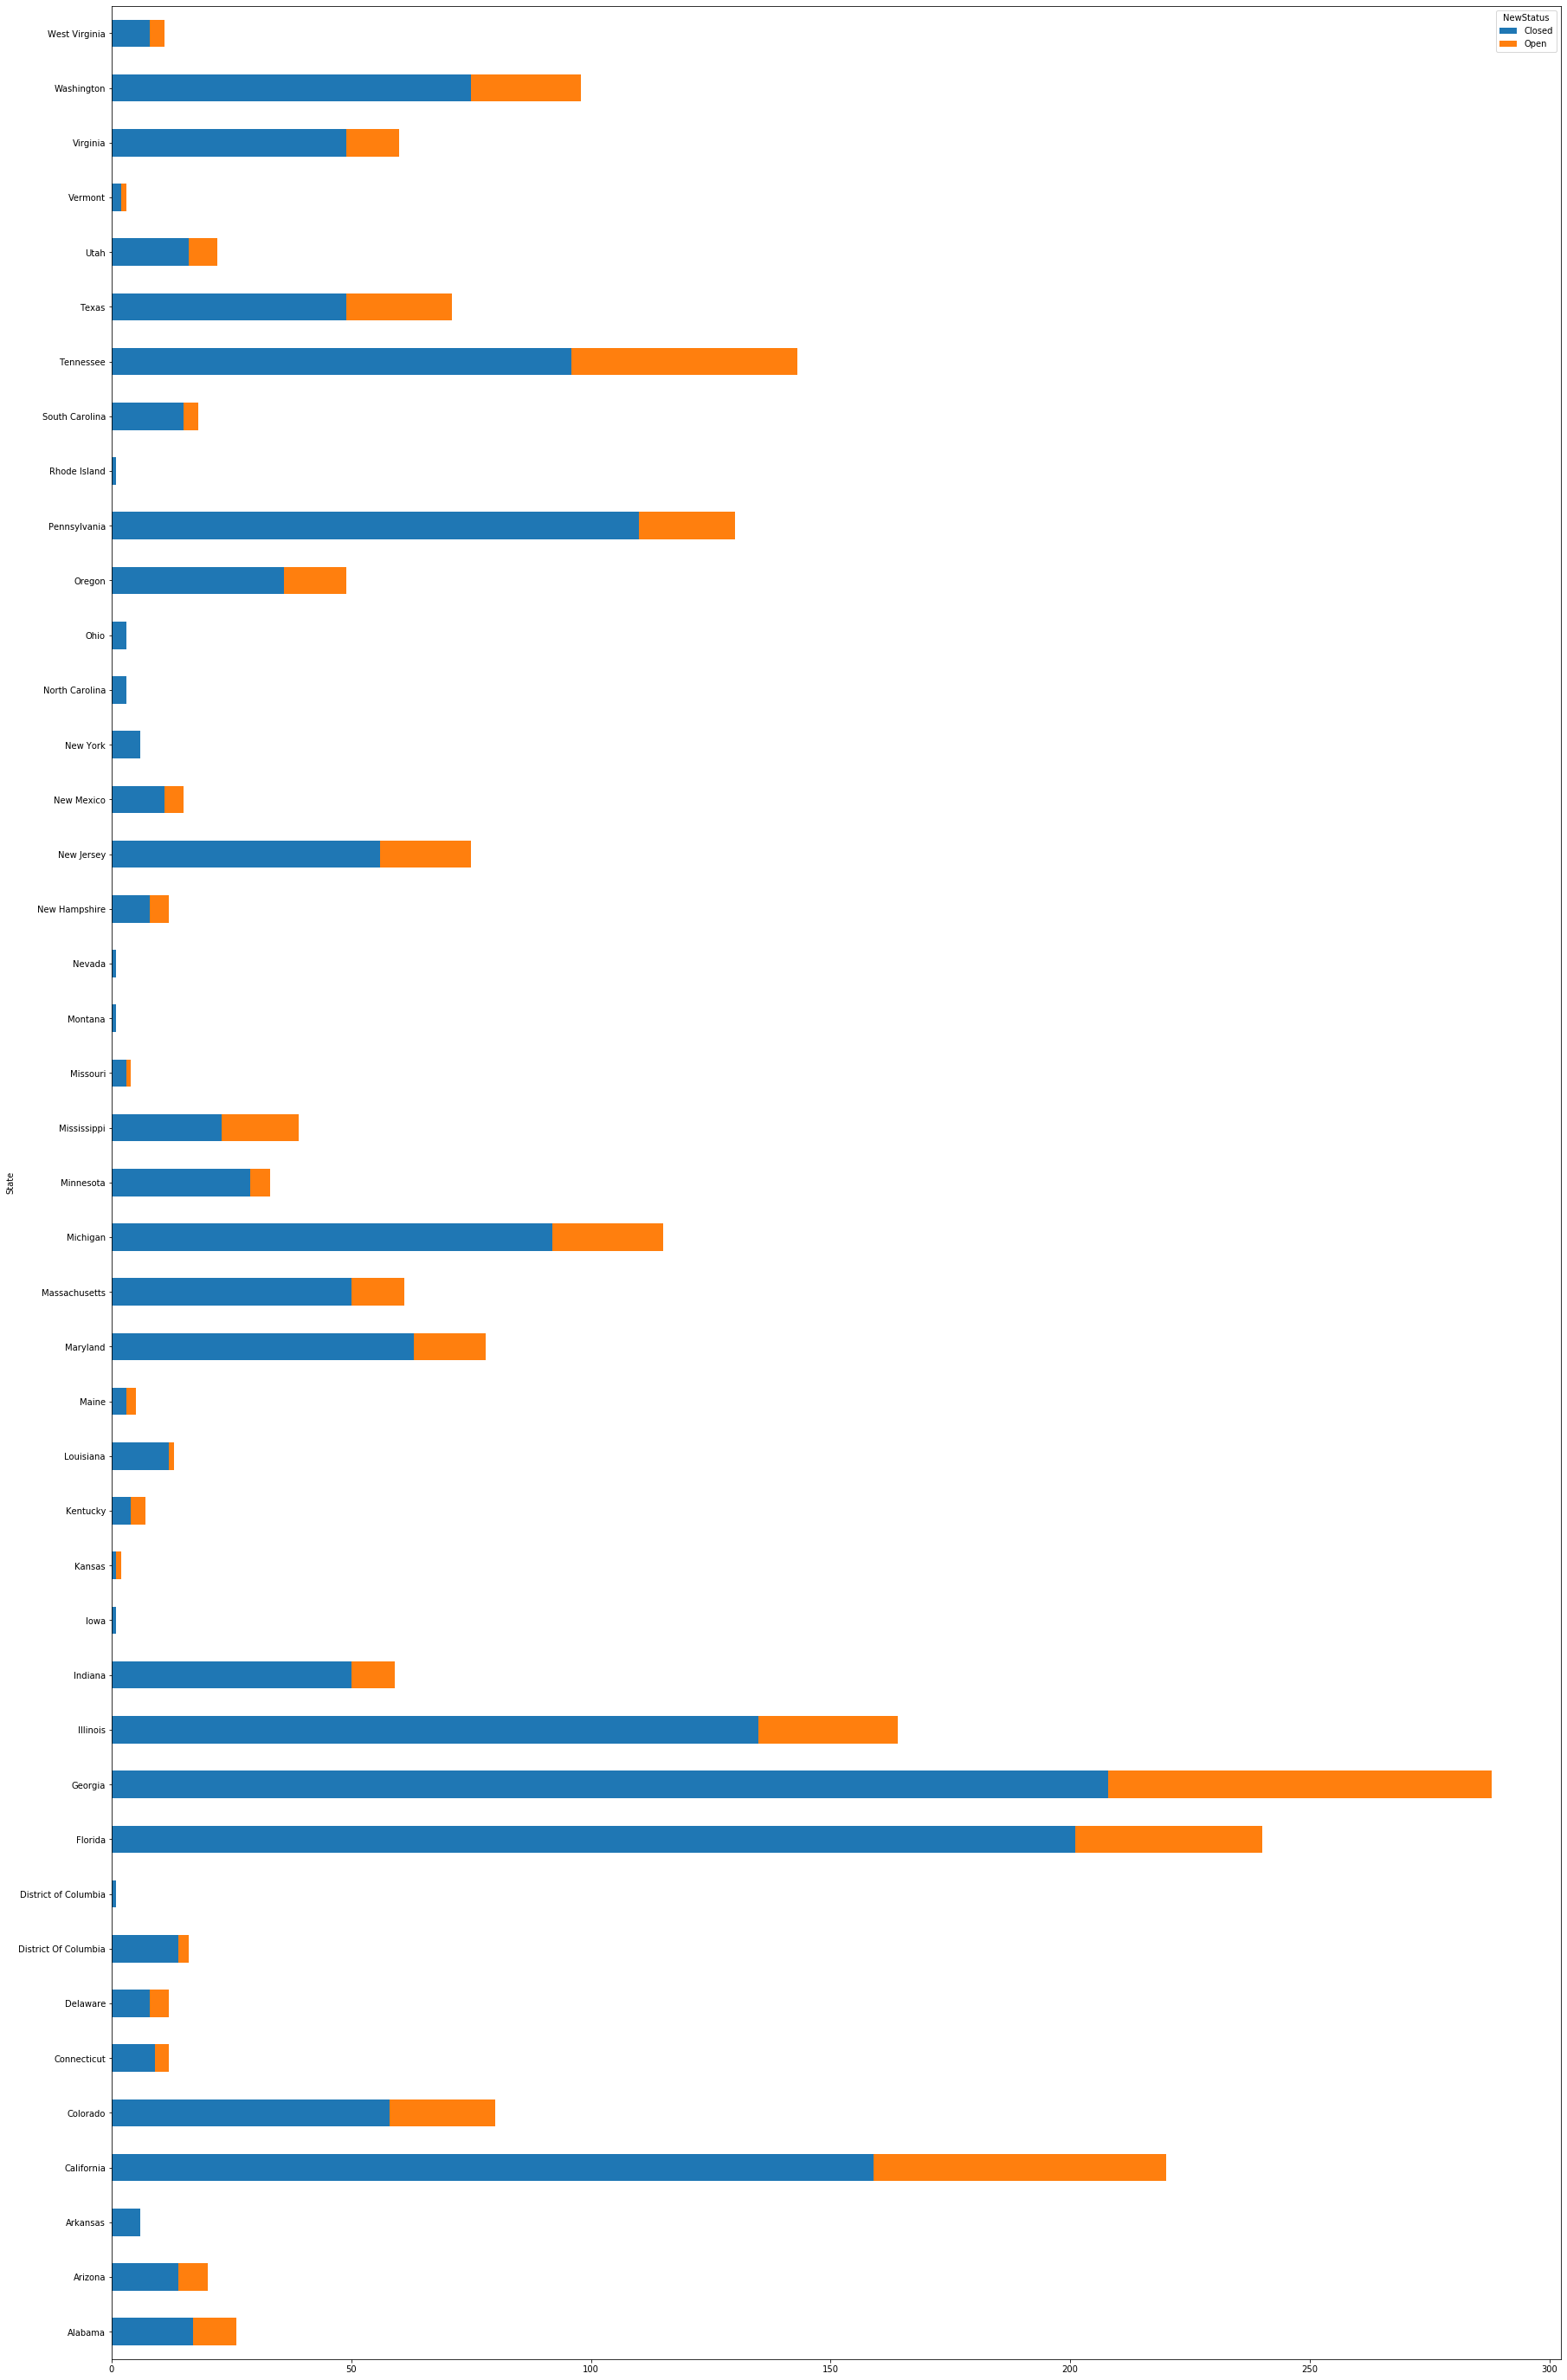

In [750]:
complaint_stack_df = pd.DataFrame(comcast_df.groupby(["State","NewStatus"]).size().unstack().fillna(0))
complaint_stack_df.plot(kind = 'barh',stacked = True, figsize=(30,50))
plt.savefig('/Users/anuragmishra/Desktop/StackedBarChart.png',dpi=400)



### Which state has the highest percentage of unresolved complaints

In [668]:
complaint_stack_df.reset_index()

NewStatus,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0
5,Connecticut,9.0,3.0
6,Delaware,8.0,4.0
7,District Of Columbia,14.0,2.0
8,District of Columbia,1.0,0.0
9,Florida,201.0,39.0


In [670]:
complaint_stack_df['Unresolved Percentage'] = (complaint_stack_df['Open'])/(complaint_stack_df['Open']+complaint_stack_df['Closed'])*100

In [673]:
complaint_stack_df=complaint_stack_df['Unresolved Percentage'].round(2)

In [682]:
percentage_df= pd.DataFrame(complaint_stack_df)
percentage_df.reset_index().max()

State                    West Virginia
Unresolved Percentage               50
dtype: object

## Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [708]:
total_df= comcast_df.groupby(['Received Via','NewStatus']).size().unstack().reset_index()
total_df

NewStatus,Received Via,Closed,Open
0,Customer Care Call,864,255
1,Internet,843,262


In [728]:
Resolved= np.array([total_df.Closed[:]]).sum()
Resolved
total = np.array([total_df.Closed[:],total_df.Open[:]]).sum()
total
Resolved_Percenatge = Resolved/total*100

Resolved_Percenatge.round()


77.0